In [78]:
pip install tensorflow keras

# Import des libraries

In [79]:
from tensorflow.keras.datasets import imdb

In [80]:
(train_data, train_labels), (test_data, test_labels)  = imdb.load_data(num_words = 10000)

In [81]:
print(train_data[0])
print(train_labels[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


In [82]:
max([max(sequence) for sequence in train_data])

9999

In [83]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
 [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
 [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

# Preparing the data





# Encoding the integer sequences via multihot encoding

In [84]:
pip install numpy

In [85]:
import numpy as np

In [86]:
def vectorize_sequences(sequences, dimension = 10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i, j] = 1.
  return results


In [87]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [88]:
print(x_train[0])

[0. 1. 1. ... 0. 0. 0.]


In [89]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

##Now the data is ready to be fed into a neural network

# Building your model

In [90]:
from tensorflow import keras
from tensorflow.keras import layers

In [91]:
model = keras.Sequential([
    layers.Dense(16, activation = "relu"),
    layers.Dense(16, activation = "relu"),
    layers.Dense(1, activation = "sigmoid")
])

## compile model

In [92]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

## Listing Setting aside a validation set


In [93]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]


In [94]:
# 1. Vérifier les shapes
print("partial_x_train shape:", partial_x_train.shape)
print("partial_y_train shape:", partial_y_train.shape)
print("x_val shape:", x_val.shape)
print("y_val shape:", y_val.shape)

# 2. Vérifier le modèle
model.summary()

partial_x_train shape: (15000, 10000)
partial_y_train shape: (15000,)
x_val shape: (10000, 10000)
y_val shape: (10000,)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## Training your model

In [95]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs = 20,
                batch_size= 512,
                   validation_data= (x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 137ms/step - accuracy: 0.6716 - loss: 0.6104 - val_accuracy: 0.8688 - val_loss: 0.4087
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - accuracy: 0.8886 - loss: 0.3536 - val_accuracy: 0.8833 - val_loss: 0.3188
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.9179 - loss: 0.2579 - val_accuracy: 0.8874 - val_loss: 0.2857
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.9411 - loss: 0.1968 - val_accuracy: 0.8891 - val_loss: 0.2747
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.9494 - loss: 0.1647 - val_accuracy: 0.8797 - val_loss: 0.2993
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9598 - loss: 0.1339 - val_accuracy: 0.8816 - val_loss: 0.3003
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9687 - loss: 0.1142 - val_accuracy: 0.8851 - val_loss: 0.2920
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9741 - loss: 0.0965 - val_accuracy: 0.8838 - 

In [96]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [97]:
history_dict = history.history
#history_dict.keys()
#[u"accuracy", u"loss", u"val_accuracy", u"val_loss"]

## Plotting of data

In [98]:
import matplotlib.pyplot as plt

###  Training and validation loss

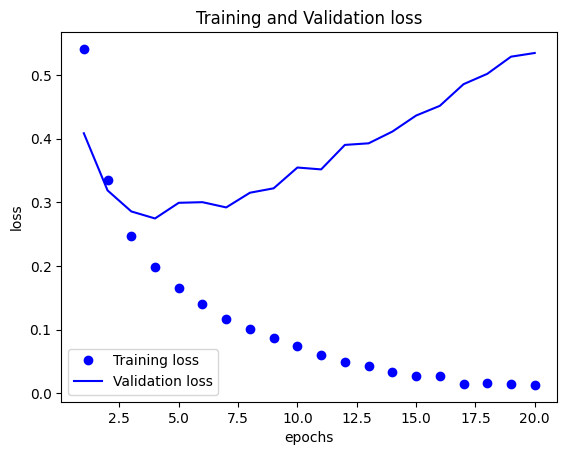

In [99]:
history_dict = history.history
history_dict.keys()
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and Validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

### Training and validation accuracy

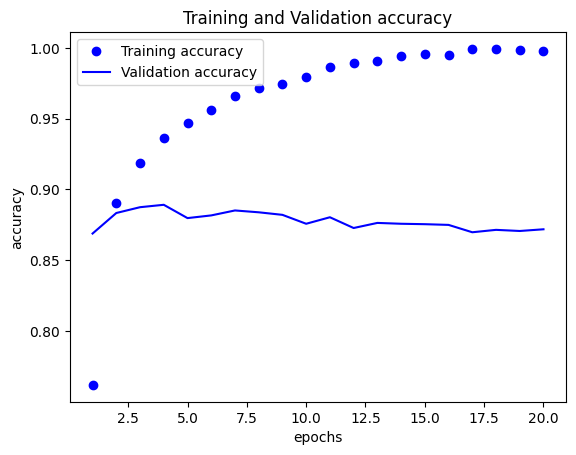

In [100]:
history_dit = history.history
loss_values = history_dict["accuracy"]
val_loss_values = history_dict["val_accuracy"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training accuracy")
plt.plot(epochs, val_loss_values, "b", label="Validation accuracy")
plt.title("Training and Validation accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()


In [101]:
res = model.evaluate(x_test, y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8594 - loss: 0.5835


#  Retraining a model from scratch

In [102]:
model = keras.Sequential(
    [
        layers.Dense(16, activation="relu"),
        layers.Dense(16, activation="relu"),
        layers.Dense(1, activation="sigmoid"),
    ]
)
model.compile(
    optimizer = "rmsprop",
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)
model.fit(x_train, y_train, epochs = 4, batch_size = 512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.7215 - loss: 0.5701
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8997 - loss: 0.2906
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9249 - loss: 0.2167
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9337 - loss: 0.1863
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8852 - loss: 0.2866


In [103]:
history = model.fit(x_train, y_train, epochs = 4, batch_size = 512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9474 - loss: 0.1535
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9551 - loss: 0.1347
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9623 - loss: 0.1167
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.9675 - loss: 0.1049
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8716 - loss: 0.3521


In [104]:
hist_dict = history.history
hist_dict.keys()

dict_keys(['accuracy', 'loss'])

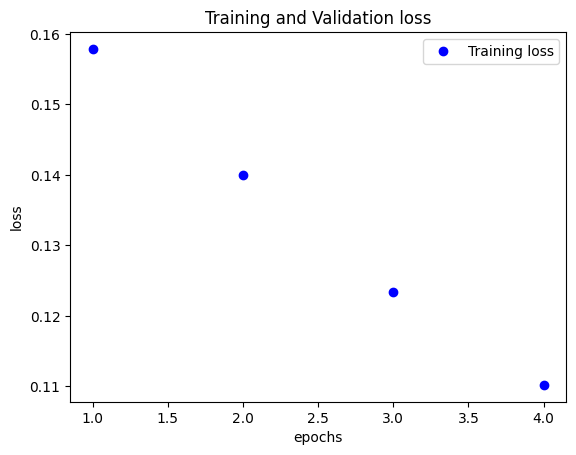

In [105]:
l_loss = hist_dict["loss"]
epochs = range(1, len(l_loss) + 1)
plt.plot(epochs, l_loss,"bo", label = "Training loss")
plt.title("Training and Validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

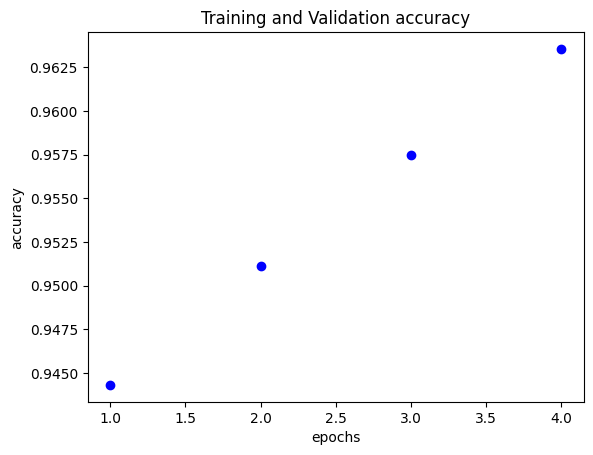

In [106]:

acc = hist_dict["accuracy"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc,"bo", label = "Training accuracy")
plt.title("Training and Validation accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.show()

In [107]:
result = model.evaluate(x_test, y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8716 - loss: 0.3521


In [112]:
prediction = model.predict(x_test)
print(prediction)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[[0.11731326]
 [0.9999558 ]
 [0.6109193 ]
 ...
 [0.09632327]
 [0.03439232]
 [0.81074727]]
